# Лабораторная работа: Геометрические алгоритмы в 2D


## Часть 1: Попадание точки в круг и треугольник

### Задание: Проверка геометрических положений

Реализуйте классы **Point**, **Circle** и **Triangle** для проверки попадания точки в круг и треугольник, аналогично лекции 9.

**Класс Point** хранит координаты `x, y` с методом `__str__`.

**Класс Circle** содержит центр (`Point`) и радиус, с методом для проверки `point_in_circle(point)`.

**Класс Triangle** содержит три вершины (`Point`), с методом `point_in_triangle(point)` на основе векторного произведения (barycentric coordinates).

**Генератор случайных точек** внутри ограничивающего прямоугольника, содержащего фигуры:

Создайте генератор `generate_points(xmin, xmax, ymin, ymax, n)`, который случайно создаёт `n` точек с координатами в данном диапазоне.

**Проверку** для всех сгенерированных точек попадания в круг и треугольник.

**Визуализацию** с помощью matplotlib:

- Отобразите круг и треугольник.
- Отметьте **зелёным** цветом точки, попавшие внутрь фигуры, **красным** — вне.
- Используйте различные маркеры для точек в круге и в треугольнике для наглядности.


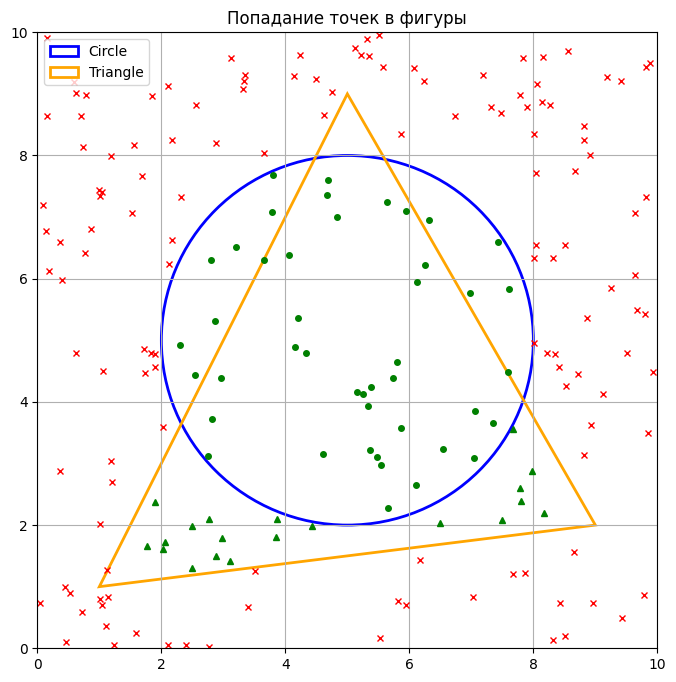

In [84]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import math

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return f"({self.x:.2f}, {self.y:.2f})"

class Circle:
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius
    
    def point_in_circle(self, point):
        # Точка внутри, если расстояние до центра <= радиусу
        return (point.x - self.center.x)**2 + (point.y - self.center.y)**2 <= self.radius**2

class Triangle:
    def __init__(self, p1, p2, p3):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
    
    def point_in_triangle(self, p):
        # Метод барицентрических координат (через векторное произведение)
        def sign(p1, p2, p3):
            return (p1.x - p3.x) * (p2.y - p3.y) - (p2.x - p3.x) * (p1.y - p3.y)

        d1 = sign(p, self.p1, self.p2)
        d2 = sign(p, self.p2, self.p3)
        d3 = sign(p, self.p3, self.p1)

        has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
        has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)

        return not (has_neg and has_pos)

def generate_points(xmin, xmax, ymin, ymax, n):
    return [Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax)) for _ in range(n)]

# --- Инициализация фигур ---
circle = Circle(Point(5, 5), 3)
triangle = Triangle(Point(1, 1), Point(9, 2), Point(5, 9))

# Генерация точек
points = generate_points(0, 10, 0, 10, 200)

# --- Визуализация ---
fig, ax = plt.subplots(figsize=(8, 8))

# Рисуем круг
circ_patch = patches.Circle((circle.center.x, circle.center.y), circle.radius, fill=False, edgecolor='blue', linewidth=2, label='Circle')
ax.add_patch(circ_patch)

# Рисуем треугольник
tri_patch = patches.Polygon([(triangle.p1.x, triangle.p1.y), (triangle.p2.x, triangle.p2.y), (triangle.p3.x, triangle.p3.y)], 
                            fill=False, edgecolor='orange', linewidth=2, label='Triangle')
ax.add_patch(tri_patch)

# Проверка и отрисовка точек
for p in points:
    in_c = circle.point_in_circle(p)
    in_t = triangle.point_in_triangle(p)
    
    if in_c:
        ax.plot(p.x, p.y, 'go', markersize=4) # Зеленый круг
    elif in_t:
        ax.plot(p.x, p.y, 'g^', markersize=4) # Зеленый треугольник
    else:
        ax.plot(p.x, p.y, 'rx', markersize=4) # Красный крест (мимо)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.legend()
plt.grid(True)
plt.title("Попадание точек в фигуры")
plt.show()

## Часть 2: Пересечение отрезков и окружностей

### Задание: Алгоритмы геометрического пересечения

Расширьте систему классов из Части 1 для проверки пересечения отрезков с окружностями и отрезков между собой.

**Класс Segment** содержит две вершины (`Point` A и B), с методами:
- `__str__` для отображения отрезка
- `length()` — вычисление длины отрезка
- `intersects_circle(circle)` — проверка пересечения отрезка с окружностью (возвращает список точек пересечения или пустой список)
- `intersects_segment(other)` — проверка пересечения двух отрезков (возвращает точку пересечения или None)

**Реализация алгоритмов пересечения:**
- **Отрезок ↔ Окружность**: Решение квадратного уравнения для расстояния от центра окружности до отрезка 
- **Отрезок ↔ Отрезок**: Метод на основе векторного произведения и параметризации (ориентация точек) 

**Генератор тестовых конфигураций:**
- `generate_segments(n, xmin, xmax, ymin, ymax)` — генератор n случайных отрезков в прямоугольнике
- Создайте несколько тестовых окружностей и отобразите все возможные случаи пересечения

**Визуализация с помощью matplotlib:**
- Отобразите окружность(и) и множество отрезков
- **Зелёные отрезки** — пересекают окружность (отметьте точки пересечения)
- **Синие отрезки** — полностью внутри окружности
- **Красные отрезки** — полностью вне окружности  
- **Жёлтые точки** — точки пересечения отрезков между собой
- Используйте легенду и сетку для наглядности


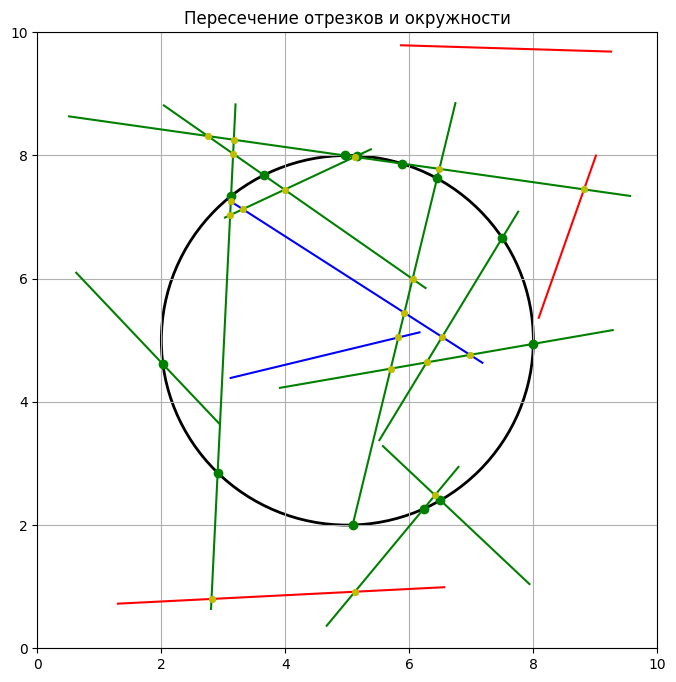

In [85]:
class Segment:  # отрезок с двумя концами
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __str__(self):
        return f"Segment({self.p1} -> {self.p2})"

    def length(self):
        return math.sqrt((self.p2.x - self.p1.x)**2 + (self.p2.y - self.p1.y)**2)

    def intersects_circle(self, circle):
        # Параметрическое уравнение отрезка: P(t) = A + t(B - A), 0 <= t <= 1
        # Расстояние до центра C: |P(t) - C|^2 = r^2
        dx = self.p2.x - self.p1.x
        dy = self.p2.y - self.p1.y
        fx = self.p1.x - circle.center.x
        fy = self.p1.y - circle.center.y

        a = dx**2 + dy**2
        b = 2 * (fx * dx + fy * dy)
        c = (fx**2 + fy**2) - circle.radius**2

        discriminant = b**2 - 4*a*c
        intersections = []

        if discriminant >= 0:
            discriminant = math.sqrt(discriminant)
            t1 = (-b - discriminant) / (2*a) if a != 0 else -1
            t2 = (-b + discriminant) / (2*a) if a != 0 else -1

            for t in [t1, t2]:
                if 0 <= t <= 1:
                    intersections.append(Point(self.p1.x + t*dx, self.p1.y + t*dy))
        return intersections
    
    def is_fully_inside_circle(self, circle): # отрезок внутри окружности
        return circle.point_in_circle(self.p1) and circle.point_in_circle(self.p2)

    def intersects_segment(self, other): # пересечение отрезков
        # Метод ориентации
        def on_segment(p, a, b):
            return (p.x <= max(a.x, b.x) and p.x >= min(a.x, b.x) and
                    p.y <= max(a.y, b.y) and p.y >= min(a.y, b.y))

        def orientation(p, q, r):
            val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
            if val == 0: return 0
            return 1 if val > 0 else 2

        p1, q1 = self.p1, self.p2
        p2, q2 = other.p1, other.p2

        o1 = orientation(p1, q1, p2)
        o2 = orientation(p1, q1, q2)
        o3 = orientation(p2, q2, p1)
        o4 = orientation(p2, q2, q1)

        # Общий случай
        if (o1 != o2 and o3 != o4):
             # Находим точку пересечения прямых
            det = (q1.x - p1.x) * (q2.y - p2.y) - (q1.y - p1.y) * (q2.x - p2.x)
            if det == 0: return None
            
            t = ((p2.x - p1.x) * (q2.y - p2.y) - (p2.y - p1.y) * (q2.x - p2.x)) / det
            return Point(p1.x + t * (q1.x - p1.x), p1.y + t * (q1.y - p1.y))

        return None

def generate_segments(n, xmin, xmax, ymin, ymax): # генерация случайных отрезков
    segments = []
    for _ in range(n):
        p1 = Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))
        p2 = Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))
        segments.append(Segment(p1, p2))
    return segments

# --- Тестирование ---
circle_test = Circle(Point(5, 5), 3)
segments = generate_segments(15, 0, 10, 0, 10)

fig, ax = plt.subplots(figsize=(8, 8))
ax.add_patch(patches.Circle((circle_test.center.x, circle_test.center.y), 
                            circle_test.radius, fill=False, edgecolor='black', linewidth=2))

# Проверка пересечений
seg_intersects = []
all_seg_points = []

for seg in segments:
    hits = seg.intersects_circle(circle_test)
    color = 'red'
    
    if seg.is_fully_inside_circle(circle_test):
        color = 'blue'
    elif hits:
        color = 'green'
        for h in hits:
            ax.plot(h.x, h.y, 'go') # Точки пересечения с кругом
            
    ax.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y], color=color)
    
    # Пересечения отрезков между собой
    for other_seg in segments:
        if seg == other_seg: continue
        cross = seg.intersects_segment(other_seg)
        if cross:
            ax.plot(cross.x, cross.y, 'y.', markersize=8) # Желтые точки - пересечение отрезков

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.grid()
plt.title("Пересечение отрезков и окружности")
plt.show()

## Часть 3: Формула Гаусса для площади многоугольника

### Задание: Вычисление площади произвольных многоугольников

Реализуйте класс **Polygon** для работы с многоугольниками и вычисления их площади по формуле Гаусса (шнуровки).

**Класс Polygon** содержит список вершин (`List[Point]`), с методами:
- `__init__(vertices: List[Point])` — конструктор (проверка на самопересечение опционально)
- `__str__()` — отображение координат вершин
- `area()` — вычисление площади по формуле Гаусса:  
  $S = \frac{1}{2} \left| \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) \right| $,  
  где по соглашению \( (x_{n+1}, y_{n+1}) = (x_1, y_1) \).
- `is_convex()` — проверка выпуклости многоугольника
- `centroid()` — вычисление центра масс (средневзвешенных координат)




**Генератор многоугольников:**
- `generate_polygons(n, xmin, xmax, ymin, ymax, min_sides=3, max_sides=8)` — генератор n случайных выпуклых/вогнутых многоугольников
- `generate_regular_polygon(sides, center, radius)` — правильный многоугольник

**Визуализация с помощью matplotlib:**
- Отобразите несколько многоугольников разных форм
- **Заливка** пропорциональна площади (alpha=0.5, разные цвета)
- **Подписи** с точной площадью рядом с каждым многоугольником
- **Сравнение** с площадью по разбиению на треугольники (для проверки)
- **Легенда** с площадями и типом (выпуклый/вогнутый)


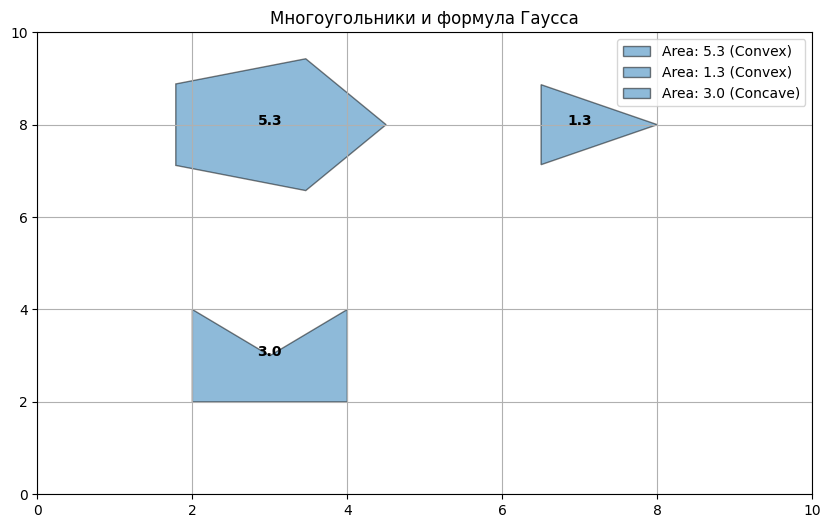

In [86]:
class Polygon:
    def __init__(self, vertices):
        self.vertices = vertices

    def area(self):
        # Формула Гаусса площадь
        n = len(self.vertices)
        s = 0.0
        for i in range(n):
            j = (i + 1) % n
            s += self.vertices[i].x * self.vertices[j].y
            s -= self.vertices[j].x * self.vertices[i].y
        return 0.5 * abs(s)

    def is_convex(self):
        # Проверка знаков векторного произведения соседних ребер
        n = len(self.vertices)
        if n < 3: return False
        
        def cross_product(p1, p2, p3):
            return (p2.x - p1.x) * (p3.y - p2.y) - (p2.y - p1.y) * (p3.x - p2.x)
        
        signs = []
        for i in range(n):
            p1 = self.vertices[i]
            p2 = self.vertices[(i + 1) % n]
            p3 = self.vertices[(i + 2) % n]
            cp = cross_product(p1, p2, p3)
            if cp != 0:
                signs.append(cp > 0)
        
        return all(s == signs[0] for s in signs)

    def centroid(self):
        cx, cy = 0.0, 0.0
        n = len(self.vertices)
        # Простое среднее для вершин (геометрический центр)
        for p in self.vertices:
            cx += p.x
            cy += p.y
        return Point(cx / n, cy / n)

def generate_regular_polygon(sides, center, radius): # создание многоугольника
    verts = []
    angle_step = 2 * math.pi / sides
    for i in range(sides):
        x = center.x + radius * math.cos(i * angle_step)
        y = center.y + radius * math.sin(i * angle_step)
        verts.append(Point(x, y))
    return Polygon(verts)

# --- Визуализация ---
polys = [
    generate_regular_polygon(5, Point(3, 8), 1.5),
    generate_regular_polygon(3, Point(7, 8), 1.0),
    Polygon([Point(2, 2), Point(4, 2), Point(4, 4), Point(3, 3), Point(2, 4)]) # Невыпуклый
]

fig, ax = plt.subplots(figsize=(10, 6))

for i, poly in enumerate(polys):
    pts = [(v.x, v.y) for v in poly.vertices]
    poly_patch = patches.Polygon(pts, fill=True, alpha=0.5, edgecolor='black', 
                                 label=f"Area: {poly.area():.1f} ({'Convex' if poly.is_convex() else 'Concave'})")
    ax.add_patch(poly_patch)
    
    # Подпись площади
    c = poly.centroid()
    ax.text(c.x, c.y, f"{poly.area():.1f}", ha='center', fontweight='bold')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.legend()
plt.title("Многоугольники и формула Гаусса")
plt.grid()
plt.show()

# Прикладная задача
## Оценка площади озера по спутниковому снимку 

По результатам сегментации спутникового изображения береговая линия озера аппроксимирована многоугольником с вершинами в пиксельных координатах. Известно пространственное разрешение снимка (например, 1 пиксель = 2 м по обеим осям).

### Задача
- Перевести координаты вершин из пикселей в метры, умножив каждую координату на масштаб:  
  $x'_i = s_x * x_i,  y'_i = s_y * y_i$  (для квадратного пикселя s_x = s_y = s).
- С помощью формулы Гаусса вычислить площадь озера в квадратных метрах и гектарах:  
  $S = 1/2 * | Σ_{i=1}^{n} (x'_i y'_{i+1} - x'_{i+1} y'_i) |, где (x'_{n+1}, y'_{n+1}) = (x'_1, y'_1)$; затем S_га = S / 10 000.
- Сравнить полученную площадь с заданным порогом (например, 10 гектаров), чтобы классифицировать объект как «малое озеро» или «крупный водоём».


## Чтобы узнать вариант введите ваш номер в списке

In [87]:
# Ваш ID = 25
print(f"Вариант: {3 % 6}")

Вариант: 3


## Вариант 1: Озеро в Карелии (малый водоём)

**Название объекта:** Озеро Малое Круглое  
**Местоположение:** Республика Карелия  

**Координаты береговой линии (пиксели на снимке):**

[
(145, 87), (162, 76), (188, 81), (201, 94),
(208, 112), (194, 128), (172, 135), (151, 130),
(133, 117), (126, 101), (129, 89)
]

**Пространственное разрешение:** 1 пиксель = 1.5 метра  
**Порог классификации:** 5 гектаров (для малых озёр)  

---
## Вариант 2: Старица реки Волги

**Название объекта:** Старица "Подкова"  
**Местоположение:** Волго-Ахтубинская пойма, Астраханская область  

**Координаты (пиксели):**

[
(320, 180), (340, 165), (370, 160), (400, 165),
(420, 180), (435, 200), (440, 225), (430, 250),
(410, 265), (380, 270), (350, 260), (330, 240),
(315, 220), (310, 200)
]

**Пространственное разрешение:** 1 пиксель = 2.0 метра  
**Порог классификации:** 8 гектаров  

---

## Вариант 3: Городской пруд (искусственный водоём)

**Название объекта:** Парковый пруд "Зеркальный"  
**Местоположение:** Городской парк, Москва  

**Координаты (пиксели):**

[
(80, 120), (110, 100), (150, 95), (190, 105),
(220, 125), (235, 155), (220, 185), (190, 205),
(150, 210), (110, 200), (80, 180), (65, 150)
]

**Пространственное разрешение:** 1 пиксель = 0.5 метра (высокое разрешение)  
**Порог классификации:** 2 гектара (для городских объектов)  

---

## Вариант 4: Альпийское ледниковое озеро

**Название объекта:** Ледниковое озеро "Голубое"  
**Местоположение:** Кавказские горы, высота 2800 м  

**Координаты (пиксели):**

[
(50, 70), (85, 55), (125, 50), (165, 60),
(195, 80), (210, 110), (200, 145), (170, 170),
(130, 180), (90, 170), (60, 150), (40, 120),
(35, 95)
]

**Пространственное разрешение:** 1 пиксель = 4.0 метра (низкое разрешение горной съёмки)  
**Порог классификации:** 15 гектаров (горные озёра)  

---

## Вариант 5: Водохранилище на малой реке

**Название объекта:** Водохранилище "Приозерное"  
**Местоположение:** Смоленская область  

**Координаты (пиксели):**

[
(200, 100), (250, 80), (310, 85), (360, 105),
(400, 140), (420, 185), (405, 230), (360, 260),
(300, 270), (240, 250), (200, 220), (180, 180),
(175, 140), (185, 115)
]

**Пространственное разрешение:** 1 пиксель = 3.0 метра  
**Порог классификации:** 20 гектаров (водохранилища)  

---

## Вариант 6: Техногенный карьер, заполненный водой

**Название объекта:** Затопленный карьер "Северный"  
**Местоположение:** Кемеровская область, бывший угольный разрез  

**Координаты (пиксели):**

[
(90, 60), (130, 40), (180, 35), (230, 45),
(270, 70), (295, 105), (300, 145), (285, 185),
(250, 215), (200, 225), (150, 210), (110, 180),
(85, 140), (80, 100)
]

**Пространственное разрешение:** 1 пиксель = 2.5 метра  
**Порог классификации:** 10 гектаров (техногенные объекты)  


Результаты для Варианта 3 (Парковый пруд 'Зеркальный'):
Площадь озера: 3575.00 кв.м
Площадь в гектарах: 0.3575 га
Классификация: МАЛОЕ ОЗЕРО (меньше 2 га)


/var/folders/x9/_gkrlffj4ns8m_c5nky6my700000gn/T/ipykernel_1127/1428825659.py:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = patches.Polygon(pts, fill=True, color='skyblue', edgecolor='darkblue', linewidth=2)


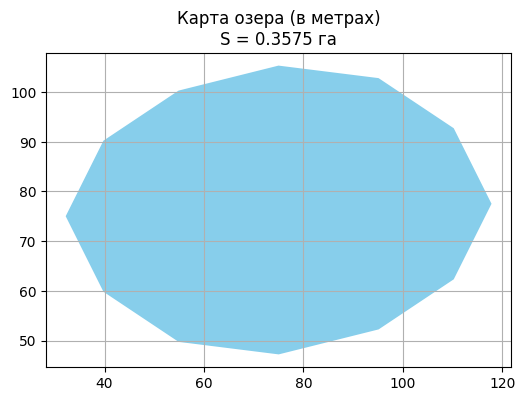

In [88]:
# === РЕШЕНИЕ ПРИКЛАДНОЙ ЗАДАЧИ ДЛЯ ВАРИАНТА 3 ===

# 1. Данные варианта Парковый пруд "Зеркальный")
raw_coords_pixels = [
(80, 120), (110, 100), (150, 95), (190, 105),
(220, 125), (235, 155), (220, 185), (190, 205),
(150, 210), (110, 200), (80, 180), (65, 150)
]
scale = 0.5      # 1 пиксель = 0.5 метра
threshold_ha = 2 # Порог 2 гектаров

# 2. Перевод в метры и создание многоугольника
meter_coords = []
for (px, py) in raw_coords_pixels:
    meter_coords.append(Point(px * scale, py * scale))

lake_polygon = Polygon(meter_coords)

# 3. Вычисление площади
area_sq_m = lake_polygon.area()
area_ha = area_sq_m / 10000.0

# 4. Вывод результатов
print(f"Результаты для Варианта 3 (Парковый пруд 'Зеркальный'):")
print(f"Площадь озера: {area_sq_m:.2f} кв.м")
print(f"Площадь в гектарах: {area_ha:.4f} га")

# 5. Классификация
if area_ha < threshold_ha:
    print(f"Классификация: МАЛОЕ ОЗЕРО (меньше {threshold_ha} га)")
else:
    print(f"Классификация: КРУПНЫЙ ВОДОЁМ (больше {threshold_ha} га)")

# Визуализация озера
fig, ax = plt.subplots(figsize=(6, 6))
pts = [(p.x, p.y) for p in meter_coords]
patch = patches.Polygon(pts, fill=True, color='skyblue', edgecolor='darkblue', linewidth=2)
ax.add_patch(patch)
ax.autoscale()
ax.set_aspect('equal')
plt.title(f"Карта озера (в метрах)\nS = {area_ha:.4f} га")
plt.grid()
plt.show()